# Effect of gap junctions on fast spiking interneurons driven by current injection

This notebook validates the old result that when FS neurons are driven by current injections we will see a synchronisation if there are also gap junctions coupling them together.

Here we create a network of FS neurons, then simulate them without gap junctions ('''gap_junctions_disabled=True'''). Then the gap junctions are manually inserted into the network, and the simulation is rerun this time with the gap junctions. In both cases the FS neurons are driven by current injections (and not synaptic inputs).

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

network_path = os.path.join("FS_network_3-cur-inj")

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=100, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=230e-6)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_network_3-cur-inj/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 131/448 (99 neurons)
Processing hyper voxel : 187/448 (99 neurons)
Processing hyper voxel : 188/448 (99 neurons)
Processing hyper voxel : 132/448 (95 neurons)
Processing hyper voxel : 195/448 (91 neurons)
Processing hyper voxel : 139/448 (87 neurons)
Processing hyper voxel : 196/448 (82 neurons)
Processing hyper voxel : 140/448 (79 neurons)
Processing hyper voxel : 179/448 (55 neurons)
Processing hyper voxel : 123/448 (52 neurons)
Processing hyper voxel : 180/448 (50 neurons)
Processing hyper voxel : 124/448 (45 neurons)
Processing hyper voxel : 186/448 (41 neurons)
Processing hyper voxel : 130/448 (39 neurons)
Processing hyper voxel : 243/448 (38 neurons)
Processing hyper voxel : 244/448 (36 neurons)
Processing hyper voxel : 75/448 (30 neurons)
Processing hyper voxel : 251/448 (29 neurons)
Processing hyper voxel : 76/448 (27 neurons)
Processing hyper voxel : 138/448 (26 neurons)
Processing hyper voxel :

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 147068 out of total 147068 synapses
Read 18303 out of total 18303 gapJunctions


In [6]:
# !snudda_load FS_network_3-cur-inj/network-synapses.hdf5 --listN

In [7]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cal_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/caldyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/can_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/cap_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/ca

### Running FS network without gap junctions (driven by current injections)

In [8]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = "FS_network_3-experiment-config.json"
output_file_no_gj = os.path.join(network_path, "simulation", "output-no-gj.hdf5")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file, disable_gap_junctions=True, output_file=output_file_no_gj, verbose=False)

Pair recording output file: FS_network_3-cur-inj/simulation/output-no-gj.hdf5
Loading 100 neurons with 16554 synapses and 10796 gap junctions
Setting tmGabaA reversal potential to -65.0 mV


In [9]:
pr.run()

Running simulation for 0.5 s
Running Neuron simulator 500 ms, with dt=0.025
1% done. Elapsed: 16.0 s, estimated time left: 1582.2 s
7% done. Elapsed: 118.8 s, estimated time left: 1578.9 s
10% done. Elapsed: 232.4 s, estimated time left: 2091.5 s
23% done. Elapsed: 337.2 s, estimated time left: 1128.8 s
31% done. Elapsed: 454.2 s, estimated time left: 1011.1 s
42% done. Elapsed: 558.6 s, estimated time left: 771.4 s
62% done. Elapsed: 658.8 s, estimated time left: 403.8 s
86% done. Elapsed: 761.8 s, estimated time left: 124.0 s
Neuron simulation finished
Simulation run time: 820.6 s
Writing network output to FS_network_3-cur-inj/simulation/output-no-gj.hdf5


Note the lack of synchronisation in the network (without gap junctions) in the figure below.

Loading network info from FS_network_3-cur-inj/network-synapses.hdf5
Loading 100 neurons with 16554 synapses and 10796 gap junctions
Loading FS_network_3-cur-inj/simulation/output-no-gj.hdf5
Plotting traces: [0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Plotted 100 traces (total 100)


<IPython.core.display.Javascript object>


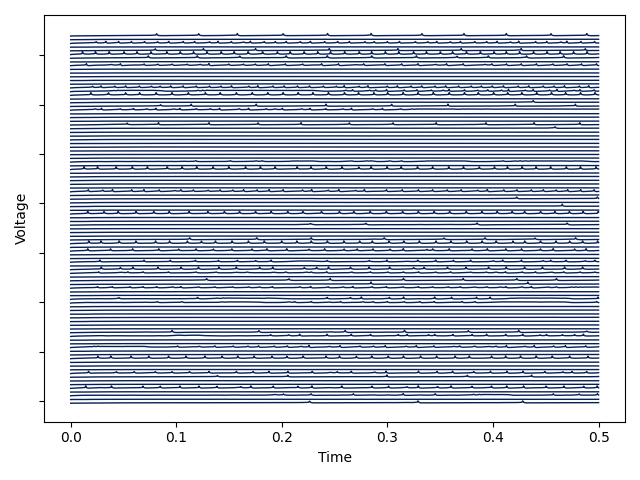

Saving to figure Network-voltage-trace-FS-cur-inj-without-GJ-FS.pdf


In [10]:
%matplotlib notebook
pr.plot_trace_overview(experiment_name="FS-cur-inj-without-GJ")

### Adding gap junctions to the network, and rerunning.

In [11]:
pr.disable_gap_junctions = False
output_file_with_gj = os.path.join(network_path, "simulation", "output-with-gj.hdf5")

pr.output_file = output_file_with_gj
pr.record.set_new_output_file(output_file_with_gj)

# Connect the gap junctions that were disabled previously
pr.connect_network_gap_junctions_local()
pr.pc.setup_transfer()

Found 21592 local gap junctions on node.


0.0

In [12]:
pr.run()

Running simulation for 0.5 s
Running Neuron simulator 500 ms, with dt=0.025
1% done. Elapsed: 4.7 s, estimated time left: 462.7 s
24% done. Elapsed: 109.2 s, estimated time left: 345.8 s
46% done. Elapsed: 212.1 s, estimated time left: 248.9 s
68% done. Elapsed: 313.4 s, estimated time left: 147.5 s
90% done. Elapsed: 414.3 s, estimated time left: 46.0 s
Neuron simulation finished
Simulation run time: 461.8 s
Writing network output to FS_network_3-cur-inj/simulation/output-with-gj.hdf5


The addition of gap junctions to the network synchronises the activity in the network when driven by current injections. It is important to realise that how we drive the network matters, neurons driven by synaptic input would not be synchronised in the same way by gap junctions.

Loading network info from FS_network_3-cur-inj/network-synapses.hdf5
Loading 100 neurons with 16554 synapses and 10796 gap junctions
Loading FS_network_3-cur-inj/simulation/output-with-gj.hdf5
Plotting traces: [0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Plotted 100 traces (total 100)


<IPython.core.display.Javascript object>


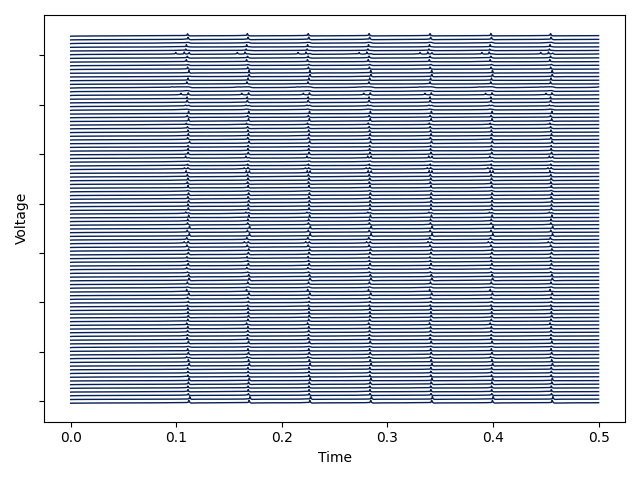

Saving to figure Network-voltage-trace-FS-cur-inj-with-GJ-FS.pdf


In [13]:
pr.plot_trace_overview(experiment_name="FS-cur-inj-with-GJ")

Loading FS_network_3-cur-inj/simulation/output-no-gj.hdf5


<IPython.core.display.Javascript object>


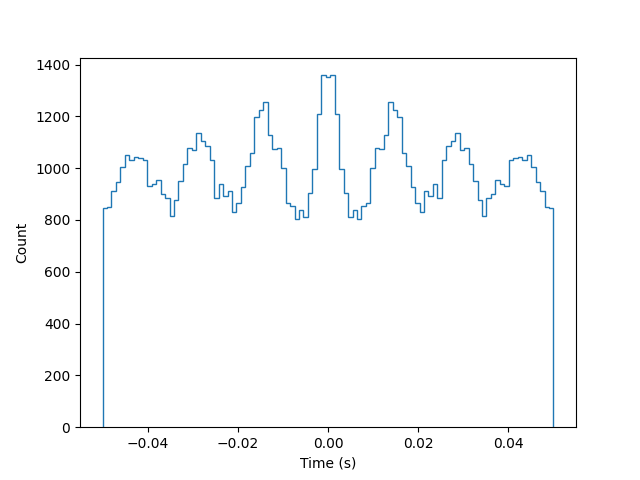

In [14]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj.png"))

Loading FS_network_3-cur-inj/simulation/output-with-gj.hdf5


<IPython.core.display.Javascript object>


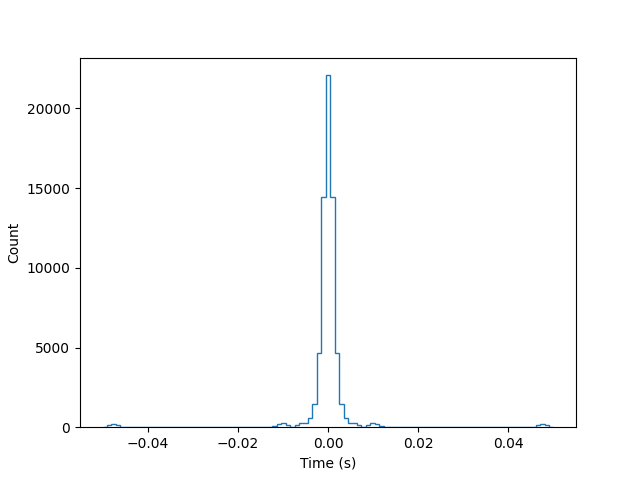

In [15]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-with-gj.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-with-gj.png"))